#GETTING DATA

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
train = pd.read_csv("/content/drive/MyDrive/train.csv")
test = pd.read_csv("/content/drive/MyDrive/test.csv")

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
columns = train.columns.value_counts()
dtype_counts = train.dtypes.value_counts()

myexplode=(0,0,0.1)

categorical_features = len(train.columns[[1,2,4,11]])
numerical_features = len(train.columns[[5,6,7,9]])
mixed_dtype_features= len(train.columns[[8,10]])

In [7]:
counts = [categorical_features,numerical_features,mixed_dtype_features]
labels = ['Categorical','Numerical','Mixed_dtype']

In [8]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#INSPECTING and PREPROCESSING DATA

In [10]:
train["Name"].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [11]:
def preprocess_and_visualize_titles(data):
    title = [i.split(',')[1].split('.')[0].strip() for i in data['Name']]
    data['title'] = pd.Series(title)

    value_counts = data['title'].value_counts()

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    cell_text = [[title, count] for title, count in value_counts.items()]
    ax1.table(cellText=cell_text, colLabels=['Title', 'Count'], cellLoc='center', loc='center')
    ax1.axis('off')
    ax1.set_title('Value Counts')

    sns.countplot(data=data, x='title', ax=ax2)
    ax2.set_title('Count Plot')
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha='right')

    plt.show()

    data["title"] = data["title"].replace(['Lady', 'the Countess', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    data['title'] = data['title'].replace(['Miss', 'Ms', 'Mme', 'Mlle', 'Mrs'], 'Miss/Ms/Mme/Mlle/Mrs')

    sns.set_theme(style="darkgrid")
    custom_palette = ["#F08080", "#90EE90", "#ADD8E6", "#F8B1D0"]
    data['title'].value_counts().plot(kind='bar', color=custom_palette, width=0.3)
    plt.title('Distribution of title Feature')
    plt.xticks(rotation=0)
    plt.xlabel('')
    plt.ylabel('count')
    plt.show()

    return data

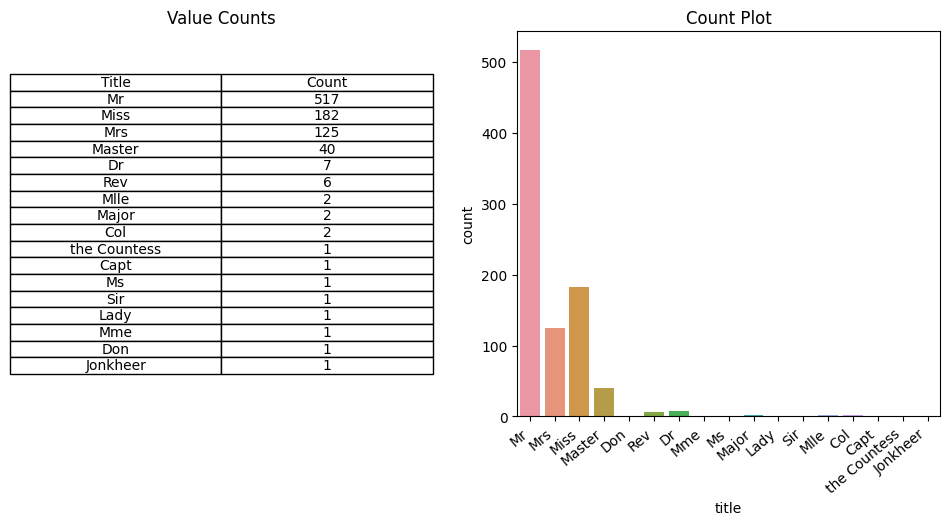

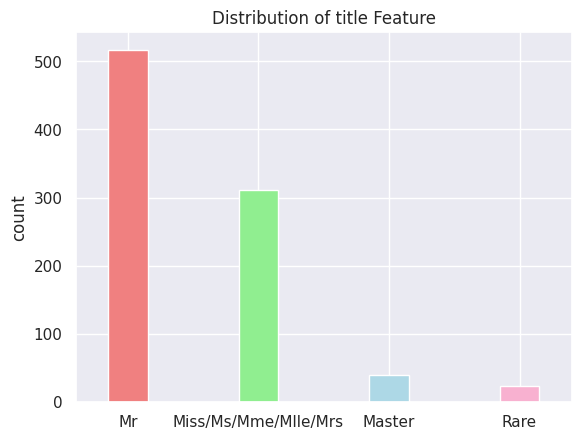

In [12]:
train = preprocess_and_visualize_titles(train.copy())

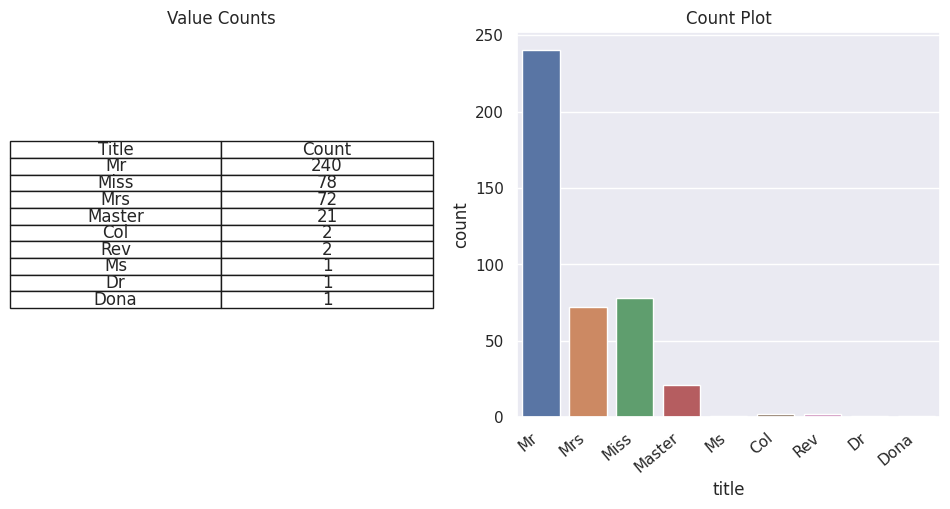

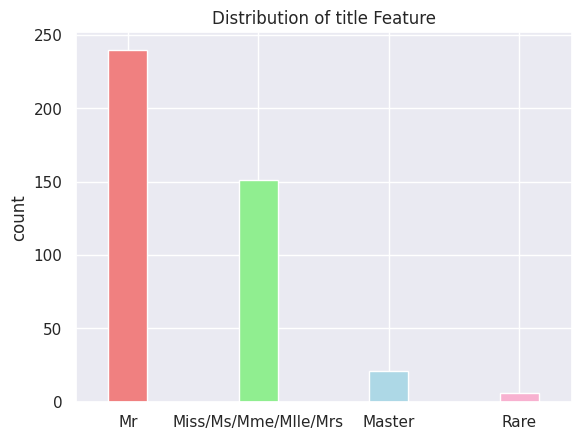

In [13]:
test = preprocess_and_visualize_titles(test.copy())

In [14]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Miss/Ms/Mme/Mlle/Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss/Ms/Mme/Mlle/Mrs
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Miss/Ms/Mme/Mlle/Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [15]:
mr_age_median = train[train['title'] == 'Mr']['Age'].median()
train.loc[(train['title'] == 'Mr') & (train['Age'].isnull()), 'Age'] = mr_age_median

miss_mrs_age_median = train[train['title'] == 'Miss/Ms/Mme/Mlle/Mrs']['Age'].median()
train.loc[(train['title'] == 'Miss/Ms/Mme/Mlle/Mrs') & (train['Age'].isnull()), 'Age'] = miss_mrs_age_median

master_age_median = train[train['title'] == 'Master']['Age'].median()
train.loc[(train['title'] == 'Master') & (train['Age'].isnull()), 'Age'] = master_age_median

rare_age_median = train[train['title'] == 'Rare']['Age'].median()
train.loc[(train['title'] == 'Rare') & (train['Age'].isnull()), 'Age'] = rare_age_median

In [16]:
test_mr_age_median = test[test['title'] == 'Mr']['Age'].median()
test.loc[(test['title'] == 'Mr') & (test['Age'].isnull()), 'Age'] = test_mr_age_median

test_miss_mrs_age_median = test[test['title'] == 'Miss/Ms/Mme/Mlle/Mrs']['Age'].median()
test.loc[(test['title'] == 'Miss/Ms/Mme/Mlle/Mrs') & (test['Age'].isnull()), 'Age'] = test_miss_mrs_age_median

test_master_age_median = test[test['title'] == 'Master']['Age'].median()
test.loc[(test['title'] == 'Master') & (test['Age'].isnull()), 'Age'] = test_master_age_median

test_rare_age_median = test[test['title'] == 'Rare']['Age'].median()
test.loc[(test['title'] == 'Rare') & (test['Age'].isnull()), 'Age'] = test_rare_age_median

In [17]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
title            0
dtype: int64

In [18]:
train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [19]:
print('Fare with respect to Passenger class:')
print(train.loc[train['Pclass'] == 1]['Fare'].describe())
print('='*25)
print(train.loc[train['Pclass'] == 2]['Fare'].describe())
print('='*25)
print(train.loc[train['Pclass'] == 3]['Fare'].describe())

Fare with respect to Passenger class:
count    216.000000
mean      84.154687
std       78.380373
min        0.000000
25%       30.923950
50%       60.287500
75%       93.500000
max      512.329200
Name: Fare, dtype: float64
count    184.000000
mean      20.662183
std       13.417399
min        0.000000
25%       13.000000
50%       14.250000
75%       26.000000
max       73.500000
Name: Fare, dtype: float64
count    491.000000
mean      13.675550
std       11.778142
min        0.000000
25%        7.750000
50%        8.050000
75%       15.500000
max       69.550000
Name: Fare, dtype: float64


In [20]:
p1_survival = train[(train['Pclass'] == 1) & (train['Fare'] <= 512.329200)]
print(p1_survival['Survived'].value_counts())
print(p1_survival[p1_survival['Survived'] == 0]['Cabin'].value_counts())
print(p1_survival[p1_survival['Survived'] == 1]['Cabin'].value_counts())

1    136
0     80
Name: Survived, dtype: int64
C23 C25 C27    2
D26            2
C124           2
C22 C26        2
E46            1
D50            1
A14            1
B37            1
C30            1
C65            1
D46            1
C95            1
B38            1
C86            1
A10            1
D48            1
E38            1
E58            1
B71            1
C68            1
C46            1
B22            1
D30            1
D6             1
B82 B84        1
A36            1
B102           1
A24            1
E63            1
C82            1
C111           1
C49            1
B30            1
C83            1
E31            1
A5             1
C110           1
B58 B60        1
C123           1
B86            1
B19            1
A7             1
A32            1
E44            1
C78            1
C87            1
E67            1
B94            1
C118           1
A19            1
C91            1
C2             1
T              1
C128           1
B51 B53 B55    1
Name: Cabin, dtype

In [21]:
p1_died_null_cabin = p1_survival[(p1_survival['Survived'] == 0) & (p1_survival['Cabin'].isnull())]
for i in p1_died_null_cabin.index.to_list():
    if i<=5:
        train.loc[i,'Cabin'] = 'C30'
    elif (i>5) & (i<=10):
        train.loc[i,'Cabin'] = 'C110'
    elif (i>10) & (i<=15):
        train.loc[i,'Cabin'] = 'B94'
    else:
        train.loc[i,'Cabin'] = 'E44'

In [22]:
p1_alive_null_cabin = p1_survival[(p1_survival['Survived'] ==1) & (p1_survival['Cabin'].isnull())]
for i in p1_alive_null_cabin.index.to_list():
    if i>=5:
        train.loc[i,'Cabin'] = 'B96 B98'
    elif (i>5) & (i<=10):
        train.loc[i,'Cabin'] = 'E40'
    elif (i>10) & (i<=15):
        train.loc[i,'Cabin'] = 'E34'
    else:
        train.loc[i,'Cabin'] = 'C7'

In [24]:
train.iloc[187]

PassengerId                                              188
Survived                                                   1
Pclass                                                     1
Name           Romaine, Mr. Charles Hallace ("Mr C Rolmane")
Sex                                                     male
Age                                                     45.0
SibSp                                                      0
Parch                                                      0
Ticket                                                111428
Fare                                                   26.55
Cabin                                                B96 B98
Embarked                                                   S
title                                                     Mr
Name: 187, dtype: object

In [25]:
p2_survival = train[(train['Pclass'] == 2) & (train['Fare'] <= 73.500000)]
print(p2_survival['Survived'].value_counts())
print(p2_survival[p2_survival['Survived'] == 0]['Cabin'].value_counts())
print(p2_survival[p2_survival['Survived'] == 1]['Cabin'].value_counts())

0    97
1    87
Name: Survived, dtype: int64
F2     1
D      1
E77    1
Name: Cabin, dtype: int64
F33     3
E101    3
F4      2
F2      2
D       2
D56     1
Name: Cabin, dtype: int64


In [26]:
p2_died_null_cabin =p2_survival[(p2_survival['Survived'] == 0) & (p2_survival['Cabin'].isnull())]
for i in p2_died_null_cabin.index.to_list():
    if i<=61:
        train.loc[i,'Cabin'] = 'F2'
    elif (i>61) & (i<=122):
        train.loc[i,'Cabin'] = 'D'
    else:
        train.loc[i,'Cabin'] = 'E77'

In [27]:
p2_alive_null_cabin = p2_survival[(p2_survival['Survived'] == 1) & (p2_survival['Cabin'].isnull())]
for i in p2_alive_null_cabin.index.to_list():
    if i<=15:
        train.loc[i,'Cabin'] = 'F33'
    elif (i>15) & (i<=30):
        train.loc[i,'Cabin'] = 'E101'
    elif (i>30) & (i<=40):
        train.loc[i,'Cabin'] = 'F4'
    elif (i>40) & (i<=50):
        train.loc[i,'Cabin'] = 'F2'
    elif (i>50) & (i<=60):
        train.loc[i,'Cabin'] = 'D'
    else:
        train.loc[i,'Cabin'] = 'D56'

In [29]:
p3_survival = train[(train['Pclass'] == 3) & (train['Fare'] <= 69.550000)]
print(p3_survival['Survived'].value_counts())
print(p3_survival[p3_survival['Survived'] == 0]['Cabin'].value_counts())
print(p3_survival[p3_survival['Survived'] == 1]['Cabin'].value_counts())

0    372
1    119
Name: Survived, dtype: int64
F G73    2
G6       2
F G63    1
F38      1
Name: Cabin, dtype: int64
G6       2
E121     2
F E69    1
E10      1
Name: Cabin, dtype: int64


In [30]:
p3_died_null_cabin = p3_survival[(p3_survival['Survived'] == 0) & (p3_survival['Cabin'].isnull())]
for i in p3_died_null_cabin.index.to_list():
    if i<=122:
        train.loc[i,"Cabin"]="G6"
    elif (i>122) & (i<=244):
        train.loc[i,'Cabin']='G6'
    elif (i>244) & (i<=305):
        train.loc[i,'Cabin']='F G63'
    else:
        train.loc[i,'Cabin']='F38'

In [31]:
p3_alive_null_cabin = p3_survival[(p3_survival['Survived'] == 1) & (p3_survival['Cabin'].isnull())]
for i in p3_alive_null_cabin.index.to_list():
    if i<=38:
        train.loc[i,"Cabin"]="F G73"
    elif (i>38) & (i<=76):
        train.loc[i,'Cabin']='E121'
    elif (i>76) & (i<=95):
        train.loc[i,'Cabin']='F E69'
    else:
        train.loc[i,'Cabin']='E10'

In [33]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
title          0
dtype: int64

In [34]:
train['Embarked'].replace(np.nan,'Q',inplace=True)
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
title          0
dtype: int64

In [35]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,G6,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Miss/Ms/Mme/Mlle/Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,F G73,S,Miss/Ms/Mme/Mlle/Mrs
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Miss/Ms/Mme/Mlle/Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,G6,S,Mr


In [36]:
from sklearn.preprocessing import RobustScaler,LabelEncoder

column_headers = ['Name','Sex', 'Ticket', 'Cabin', 'Embarked','title']
le = LabelEncoder()
train[column_headers] = train[column_headers].apply(le.fit_transform)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,1,0,3,108,1,22.0,1,0,523,7.2500,145,2,2
1,2,1,1,190,0,38.0,1,0,596,71.2833,81,0,1
2,3,1,3,353,0,26.0,0,0,669,7.9250,140,2,1
3,4,1,1,272,0,35.0,1,0,49,53.1000,55,2,1
4,5,0,3,15,1,35.0,0,0,472,8.0500,145,2,2


<Axes: >

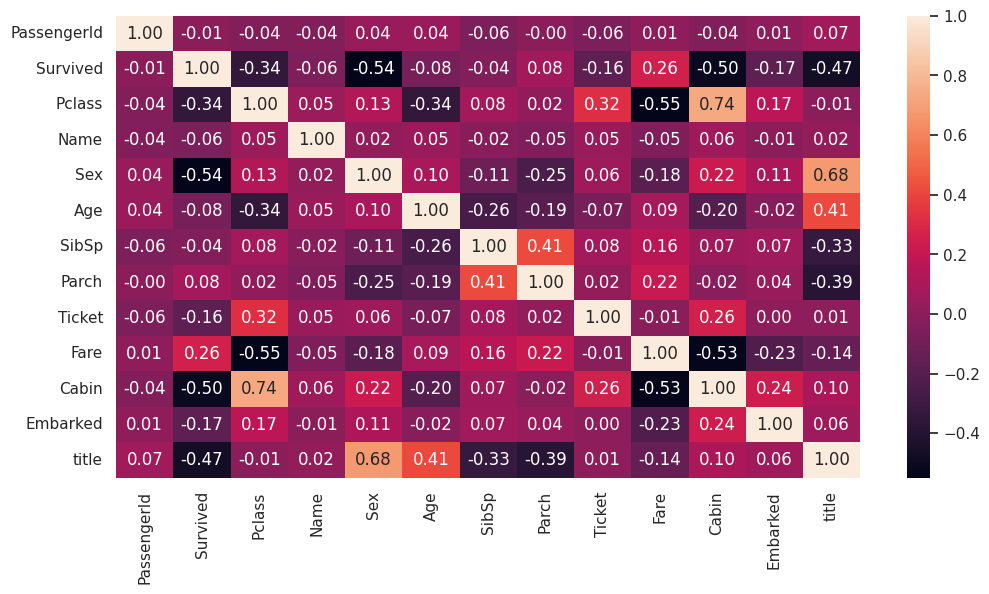

In [37]:
plt.figure(figsize=(12,6))
sns.heatmap(train.corr(),annot=True,fmt='.2f')

In [38]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Miss/Ms/Mme/Mlle/Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Miss/Ms/Mme/Mlle/Mrs


In [39]:
column_headers = ['Name','Sex', 'Ticket', 'Cabin', 'Embarked','title']
le = LabelEncoder()
test[column_headers] = test[column_headers].apply(le.fit_transform)
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,892,3,206,1,34.5,0,0,152,7.8292,76,1,2
1,893,3,403,0,47.0,1,0,221,7.0000,76,2,1
2,894,2,269,1,62.0,0,0,73,9.6875,76,1,2
3,895,3,408,1,27.0,0,0,147,8.6625,76,2,2
4,896,3,178,0,22.0,1,1,138,12.2875,76,2,1


In [40]:
X = train.drop('Survived', axis=1)
y = train['Survived']

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


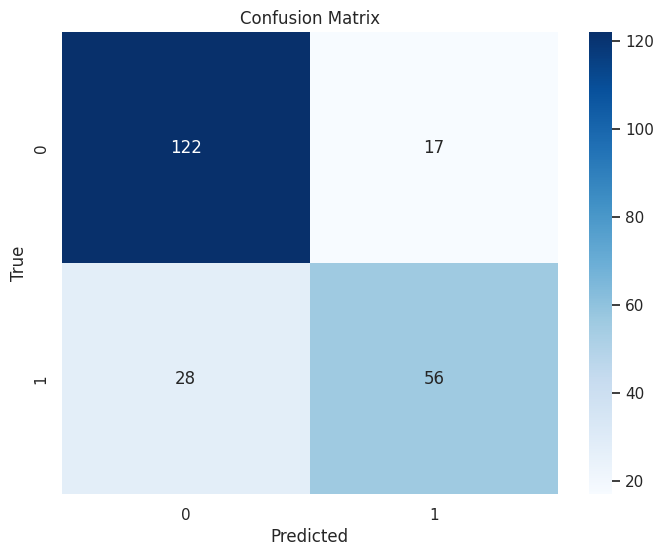

In [43]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [44]:
accuracy = accuracy_score(y_test, y_pred)

classification_rep = classification_report(y_test, y_pred)

print('='*30)
print("Accuracy:", accuracy)
print('='*30)
print("Classification Report:\n", classification_rep)

Accuracy: 0.7982062780269058
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.88      0.84       139
           1       0.77      0.67      0.71        84

    accuracy                           0.80       223
   macro avg       0.79      0.77      0.78       223
weighted avg       0.80      0.80      0.79       223



In [48]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = Sequential([
    Dense(64, activation="relu", input_dim=X_train_scaled.shape[1]),
    Dense(32, activation="relu"),
    Dense(1, activation="sigmoid")
])

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(X_train_scaled, y_train, epochs=100,verbose=0, batch_size=32, validation_split=0.2)

In [49]:
accuracy = model.evaluate(X_test_scaled, y_test)[1]
print("Test accuracy:", accuracy)

7/7 [==============================] - 0s 1ms/step - loss: 0.2403 - accuracy: 0.9148
Test accuracy: 0.9147982001304626
